In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Main Presentations/file.csv')

In [2]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [3]:
df.shape

(219294, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  219294 non-null  int64 
 1   tweets      219294 non-null  object
 2   labels      219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [5]:
df=df.drop(columns=['Unnamed: 0'])

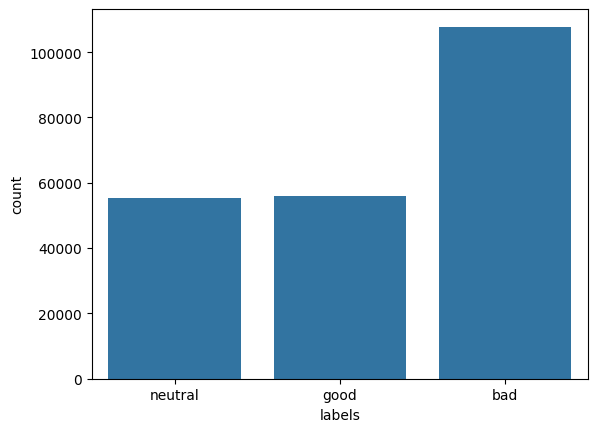

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='labels',data=df)
plt.show()

In [7]:
df['labels'].value_counts()

,count
labels,
bad,107796
good,56011
neutral,55487


In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [9]:
stem_port = PorterStemmer()

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [stem_port.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [12]:
df['tweets'] = df['tweets'].apply(stemming)

In [13]:
df['tweets']

,tweets
0,chatgpt optim languag model dialogu http co k ...
1,tri talk chatgpt new ai system optim dialogu f...
2,chatgpt optim languag model dialogu http co gl...
3,thrill share chatgpt new model optim dialog pu...
4,minut ago openai releas new chatgpt n nand use...
...,...
219289,softwar project tri replic chatgpt http co tds...
219290,ask chatgpt write nye joke seo deliv n nwhi se...
219291,chatgpt disassembl dissembl
219292,predict chatgpt noth realli specif trend past ...


In [14]:
x= df['tweets'].values
y= df['labels'].values

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
# Sample training data
training_data = ["sample text 1", "sample text 2", "another example"]

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data
vectorizer.fit(training_data)

# Now, you can use the fitted vectorizer to transform new messages
message = "new input text"
message_transformed = vectorizer.transform([message])

In [17]:
print(x)

['chatgpt optim languag model dialogu http co k rkrygyyn openai'
 'tri talk chatgpt new ai system optim dialogu feedback help us improv http co shdm g kr'
 'chatgpt optim languag model dialogu http co glebmokn w ai machinelearn datasci artificialintellig n ntrend ai ml articl identifi amp digest via granola machin driven rss bot ramsey elbash http co rprmaxup'
 ... 'chatgpt disassembl dissembl'
 'predict chatgpt noth realli specif trend past year nshould around topic see day http co zd kph dc'
 'chatgpt neat stuff http co qjjuf z']


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)

In [21]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming 'x' is your text data and 'y' are the labels

# 1. Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to your text data and transform it
X = vectorizer.fit_transform(x)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 4. Create and train the Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [22]:
y_pred = model.predict(X_test)
y_pred

array(['good', 'bad', 'good', ..., 'good', 'neutral', 'bad'], dtype=object)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8231377824391801

In [25]:
df.columns

Index(['tweets', 'labels'], dtype='object')

In [26]:
new_data = "Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr"

In [27]:
news = stemming(new_data)

In [28]:
model.predict(vectorizer.transform([news]))

array(['good'], dtype=object)

In [29]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

         bad       0.86      0.94      0.90     21435
        good       0.84      0.81      0.82     11201
     neutral       0.72      0.61      0.66     11223

    accuracy                           0.82     43859
   macro avg       0.81      0.79      0.79     43859
weighted avg       0.82      0.82      0.82     43859



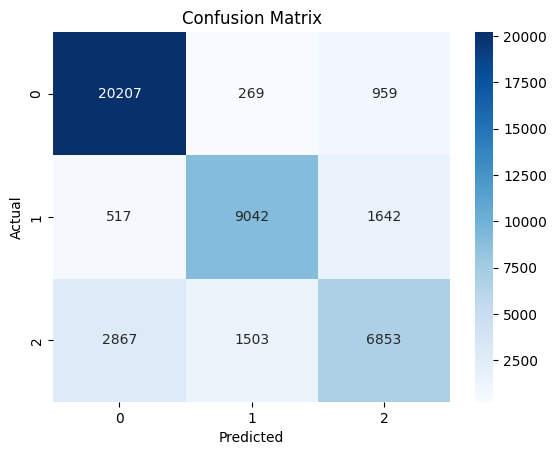

In [30]:
# Confusion matrix visualization
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
import joblib

joblib.dump(model,'model1.pkl')

# Save the fitted vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

 # Load the vectorizer
loaded_vectorizer = joblib.load('vectorizer.pkl')

# Use the loaded and fitted vectorizer to transform data
message_transformed = loaded_vectorizer.transform([message])